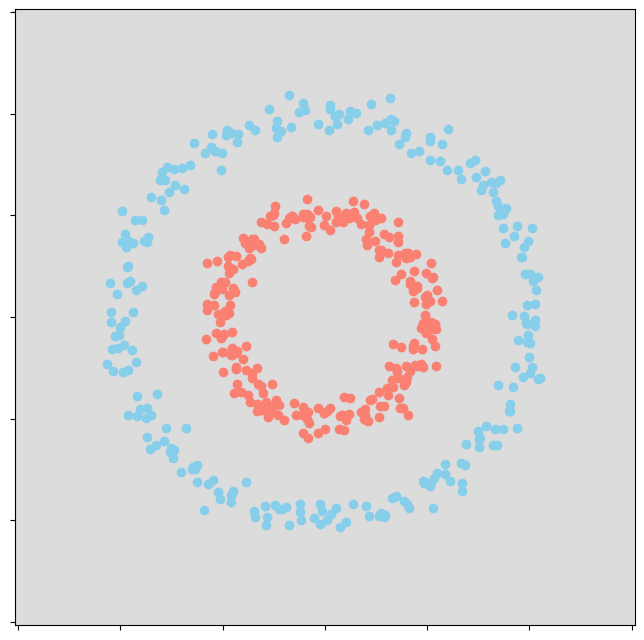

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


X, Y = make_circles(n_samples=500, factor=.5, noise=0.05)
res = 100
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

_pY = np.zeros((res, res)) + 0.5

#Visualización del mapa de predicción.

plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y ==1,0], X[Y == 1,1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import animation
from IPython.core.display import display, HTML


iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01
nn  = [2, 16, 8, 1]

#Capa 1

W1 = tf.Variable(tf.random_normal ([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

#Capa 2

W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name="Weights_2")
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

#Capa 3

W3 =  tf.Variable(tf.random_normal ([nn[2], nn[3]]), name="Weights_3")
b3 = tf.Variable(tf.random_normal([nn[3]]), name= 'bias_3')
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


#Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

#Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.05).minimize(loss)

n_steps = 1000

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

In [ ]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(n_steps):
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})
    if step % 10 == 0:
      acc = np.mean(np.round(_pY) == Y)
      print('Step',step,'/',n_steps, '- Loss = ', _loss, '-Acc = ',acc)
      _pY = sess.run(pY, feed_dict={iX: _pX}).reshape((res,res))
      iPY.append(_pY)

Step 0 / 1000 - Loss =  0.38526198 -Acc =  0.496
Step 10 / 1000 - Loss =  0.36994898 -Acc =  0.506
Step 20 / 1000 - Loss =  0.34788987 -Acc =  0.514
Step 30 / 1000 - Loss =  0.3128351 -Acc =  0.528
Step 40 / 1000 - Loss =  0.26669222 -Acc =  0.574
Step 50 / 1000 - Loss =  0.22351183 -Acc =  0.654
Step 60 / 1000 - Loss =  0.18720187 -Acc =  0.682
Step 70 / 1000 - Loss =  0.16300257 -Acc =  0.732
Step 80 / 1000 - Loss =  0.14473636 -Acc =  0.774
Step 90 / 1000 - Loss =  0.13034865 -Acc =  0.842
Step 100 / 1000 - Loss =  0.11777995 -Acc =  0.892
Step 110 / 1000 - Loss =  0.10680122 -Acc =  0.908
Step 120 / 1000 - Loss =  0.0967863 -Acc =  0.938
Step 130 / 1000 - Loss =  0.08698884 -Acc =  0.968
Step 140 / 1000 - Loss =  0.07754551 -Acc =  0.98
Step 150 / 1000 - Loss =  0.066543855 -Acc =  0.994
Step 160 / 1000 - Loss =  0.05213236 -Acc =  1.0
Step 170 / 1000 - Loss =  0.04071046 -Acc =  1.0
Step 180 / 1000 - Loss =  0.033545103 -Acc =  1.0
Step 190 / 1000 - Loss =  0.028748501 -Acc =  1.0

--- Generando animación ---


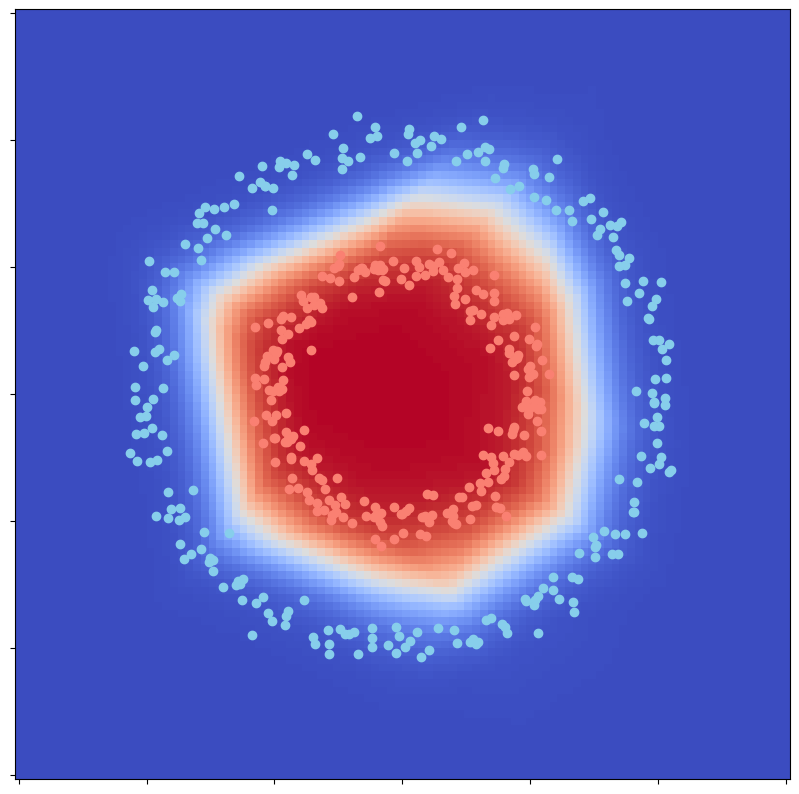

In [ ]:
ims = []
fig = plt.figure(figsize=(10,10))
print("--- Generando animación ---")
for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap='coolwarm', animated=True)
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
  plt.scatter(X[Y ==1,0], X[Y == 1,1], c="salmon")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())